# Keras函数式API

```{note}
如果模型本身就不是顺序的，那么就不能使用顺序API，可以选择使用函数式API。<br/>
本节我们使用加州房价数据集训练一个回归模型来演示keras函数式API的使用。
```

## 加州房价数据集

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#@save
def load_california_housing():
    """
    载入加州房价数据集
    输入8维，输出为房价
    """
    # 使用sklearn.datasets载入数据
    housing = fetch_california_housing()
    # 分割为训练集、验证集、测试集
    X_train_val, X_test, y_train_val, y_test = train_test_split(housing.data, housing.target)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val)
    # 标准化
    std = StandardScaler()
    # 以训练集为基准进行标准化
    X_train = std.fit_transform(X_train)
    X_val = std.transform(X_val)
    X_test = std.transform(X_test)
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)


(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_california_housing()
# 查看shape
X_train.shape, y_train.shape

((11610, 8), (11610,))

## 定义模型

In [2]:
from tensorflow import keras


# Input层需指定shape，类似于Flatten层需指定input_shape
input_ = keras.layers.Input(shape=X_train.shape[1:])
# 函数式API: output = layer(input)
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# 这里输入不仅有hidden2还有input_，因此不是顺序模型
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
# 最后指定模型的输入和输出即可
model = keras.Model(inputs=[input_], outputs=[output])

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

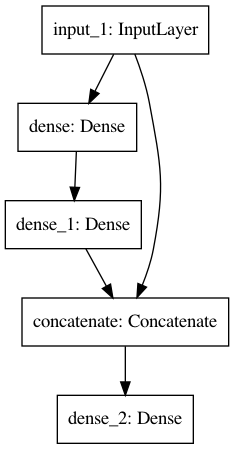

In [4]:
# 图形化展示模型
# 需安装pydot, graphviz
keras.utils.plot_model(model)

## 获取模型参数

开一个支线，简单演示一下获取keras模型参数的方法。

In [5]:
# 模型各层
model.layers

In [6]:
# 获取其中一层
hidden1 = model.layers[1]
# 获取参数
weights, biases = hidden1.get_weights()
weights.shape, biases.shape

((8, 30), (30,))

## 训练

In [7]:
# 编译
# 因为是回归模型，所以使用均方误差
model.compile(loss="mse",
              # 在优化器中指定学习率
              optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [8]:
# 训练
model.fit(X_train, y_train, 
          epochs=10, 
          validation_data=(X_val, y_val))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.0701 - val_loss: 0.9041
Epoch 2/10
363/363 [==============================] - 0s 768us/step - loss: 0.4653 - val_loss: 0.6863
Epoch 3/10
363/363 [==============================] - 0s 755us/step - loss: 0.4226 - val_loss: 0.9916
Epoch 4/10
363/363 [==============================] - 0s 782us/step - loss: 0.3989 - val_loss: 0.9223
Epoch 5/10
363/363 [==============================] - 0s 768us/step - loss: 0.3992 - val_loss: 0.6446
Epoch 6/10
363/363 [==============================] - 0s 770us/step - loss: 0.3742 - val_loss: 0.3592
Epoch 7/10
363/363 [==============================] - 0s 777us/step - loss: 0.3546 - val_loss: 0.4163
Epoch 8/10
363/363 [==============================] - 0s 779us/step - loss: 0.3460 - val_loss: 0.3627
Epoch 9/10
363/363 [==============================] - 0s 757us/step - loss: 0.3418 - val_loss: 0.7494
Epoch 10/10
363/363 [==============================] - 0s 764us/step - loss: 0.3547 

In [9]:
# 保存模型
model.save("my_california_housing_model")

INFO:tensorflow:Assets written to: my_california_housing_model/assets
